In [2]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle
import psycopg2 #for connectivity
import os
import itertools

def db_connection():
    conn = psycopg2.connect(
        host='',
        port=,
        user='',
        password='',
        database=''
    )
    return conn
print("Connected")

In [16]:
example_query = "select * from lac.rfm_table123 "
import pandas as pd
conn = db_connection()

df2 = pd.read_sql(example_query, conn)
df2.describe()  

,countmem
count,64.000000
mean,19063.343750
std,15950.440924
min,831.000000
25%,6385.250000
50%,15585.000000
75%,25607.250000
max,87235.000000


In [ ]:
example_query = "select * from lac.RFM_table "
df = pd.read_sql(example_query, conn)
df.describe() 

In [18]:
df.head()
df2.head()

,cluster,rfmclass,countmem
0,Loyal Customer,222,25731
1,recent customer,144,6779
2,Promising,224,15544
3,Customer need attention,334,29458
4,Can't loose them,411,831


In [58]:
df_merged = df.merge(df2, how='outer', left_on='rfmclass', right_on='rfmclass')
df_merged.head()

,index,monetary,tranx,rec,csn,r_quartile,f_quartile,m_quartile,rfmclass,cluster,countmem
0,7,48.2683,49.0,19.0,1000208,2,1,2,212,Loyal Customer,21995
1,97,39.1260,71.0,15.0,100203,2,1,2,212,Loyal Customer,21995
2,997,45.3193,49.0,15.0,1006213,2,1,2,212,Loyal Customer,21995
3,1117,39.8239,46.0,19.0,1008587,2,1,2,212,Loyal Customer,21995
4,1267,46.2062,127.0,14.0,1014726,2,1,2,212,Loyal Customer,21995


In [59]:
df_merged=df_merged.drop(['countmem'],axis=1)
df_merged.head()

,index,monetary,tranx,rec,csn,r_quartile,f_quartile,m_quartile,rfmclass,cluster
0,7,48.2683,49.0,19.0,1000208,2,1,2,212,Loyal Customer
1,97,39.1260,71.0,15.0,100203,2,1,2,212,Loyal Customer
2,997,45.3193,49.0,15.0,1006213,2,1,2,212,Loyal Customer
3,1117,39.8239,46.0,19.0,1008587,2,1,2,212,Loyal Customer
4,1267,46.2062,127.0,14.0,1014726,2,1,2,212,Loyal Customer


In [24]:
df_merged=df_merged.set_index('csn')

In [39]:
df_merged.reset_index()

,csn,monetary,tranx,rec
0,1000208,48.2683,49.0,19.0
1,100203,39.1260,71.0,15.0
2,1006213,45.3193,49.0,15.0
3,1008587,39.8239,46.0,19.0
4,1014726,46.2062,127.0,14.0
5,1028745,49.6509,108.0,15.0
6,1016795,47.2017,113.0,14.0
7,1040253,40.9443,53.0,16.0
8,1041445,46.7539,102.0,14.0
9,1022415,52.5978,69.0,17.0


In [44]:
#Feature relevance#
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
df_merged.columns

Index(['index', 'monetary', 'tranx', 'rec', 'csn', 'r_quartile', 'f_quartile',
       'm_quartile', 'rfmclass', 'cluster'],
      dtype='object')

In [71]:
df_merged.head()

,index,monetary,tranx,rec,csn,r_quartile,f_quartile,m_quartile,rfmclass,cluster
0,7,48.2683,49.0,19.0,1000208,2,1,2,212,Loyal Customer
1,97,39.1260,71.0,15.0,100203,2,1,2,212,Loyal Customer
2,997,45.3193,49.0,15.0,1006213,2,1,2,212,Loyal Customer
3,1117,39.8239,46.0,19.0,1008587,2,1,2,212,Loyal Customer
4,1267,46.2062,127.0,14.0,1014726,2,1,2,212,Loyal Customer


In [46]:
df_merged['r_quartile']

0          2
1          2
2          2
3          2
4          2
5          2
6          2
7          2
8          2
9          2
10         2
11         2
12         2
13         2
14         2
15         2
16         2
17         2
18         2
19         2
20         2
21         2
22         2
23         2
24         2
25         2
26         2
27         2
28         2
29         2
          ..
1220024    4
1220025    4
1220026    4
1220027    4
1220028    4
1220029    4
1220030    4
1220031    4
1220032    4
1220033    4
1220034    4
1220035    4
1220036    4
1220037    4
1220038    4
1220039    4
1220040    4
1220041    4
1220042    4
1220043    4
1220044    4
1220045    4
1220046    4
1220047    4
1220048    4
1220049    4
1220050    4
1220051    4
1220052    4
1220053    4
Name: r_quartile, Length: 1220054, dtype: int64

In [72]:
#df_merged.columns
df1=df_merged.drop(['r_quartile', 'f_quartile','m_quartile', 'rfmclass', 'cluster','index','csn'], axis=1)
df1.head()

,monetary,tranx,rec
0,48.2683,49.0,19.0
1,39.1260,71.0,15.0
2,45.3193,49.0,15.0
3,39.8239,46.0,19.0
4,46.2062,127.0,14.0


In [73]:
#Create list to loop through

dep_vars = list(df1.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = df1.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(df1.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for monetary as dependent variable: -0.003160835598334133
R2 score for tranx as dependent variable: -0.26491746747530764
R2 score for rec as dependent variable: 0.2527334296318823


In [14]:
df.corr()['lengt'].sort_values()

rec        -0.109296
monetary    0.013454
tranx       0.378373
lengt       1.000000
Name: lengt, dtype: float64

In [75]:
df_merged['cluster'].unique()

array(['Loyal Customer ', 'Hibernating', 'Customer need attention ',
       'Promising', 'Customer at High risk', 'Potential Loyalist',
       'recent customer', 'Champions', "Can't loose them "], dtype=object)

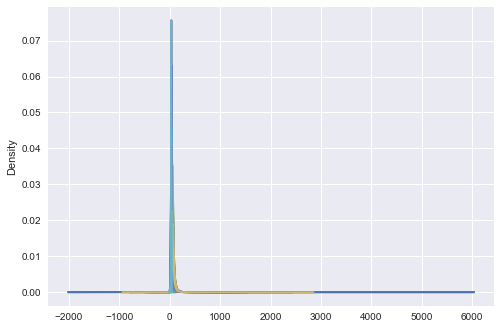

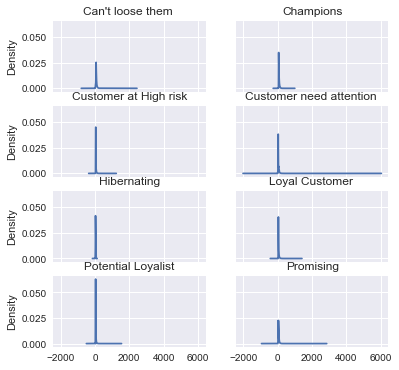

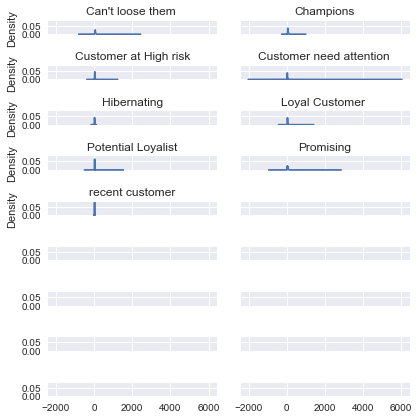

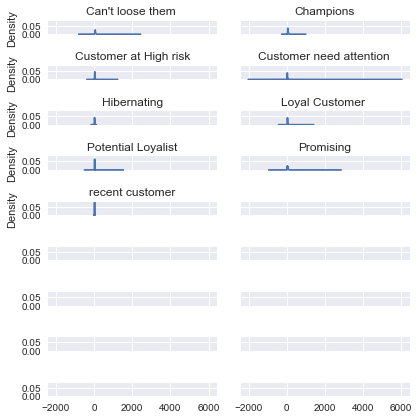

In [100]:
import matplotlib.pyplot as plt
g = df_merged.groupby('cluster').monetary
n = g.ngroups
fig, axes = plt.subplots(n , 2, figsize=(6, 6), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    group.plot.kde(title=name, ax=axes[r, c])
fig.tight_layout()
plt.show()

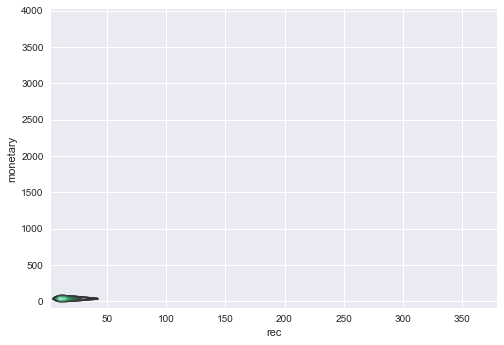

In [110]:
sns.kdeplot(df_merged.rec, df_merged.monetary)
plt.show()